# Machine Learning Exam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\saiaj'

### Part 1- Supervised Learning

### Portugal Bank Marketing dataset

In [39]:
bank_client_data=pd.read_csv(r"C:\Users\saiaj\Downloads\bank.csv")
bank_client_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
bank_client_data.shape

(41188, 21)

In [16]:
bank_client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
bank_client_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 

In [40]:
bank_client_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
bank_client_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [51]:
bank_client_data['default']

0             no
1        unknown
2             no
3             no
4             no
          ...   
41183         no
41184         no
41185         no
41186         no
41187         no
Name: default, Length: 41188, dtype: object

In [9]:
bank_client_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
columns_list=bank_client_data.columns
columns_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
for i in columns_list:
    print(i," : \n",bank_client_data[i].unique())
    print("***\n")

age  : 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
***

job  : 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***

marital  : 
 ['married' 'single' 'divorced' 'unknown']
***

education  : 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***

default  : 
 ['no' 'unknown' 'yes']
***

housing  : 
 ['no' 'yes' 'unknown']
***

loan  : 
 ['no' 'yes' 'unknown']
***

contact  : 
 ['telephone' 'cellular']
***

month  : 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***

day_of_week  : 
 ['mon' 'tue' 'wed' 'thu' 'fri']
***

duration  : 
 [ 261  149  226 ... 1246 1556 1868]
***

campaign  : 
 [ 1  2  3  4  5  6  7  8

In [41]:
bank_client_data['default'].value_counts(ascending=False)

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [43]:
bank_client_data['housing'].value_counts(ascending=False)

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [44]:
bank_client_data['loan'].value_counts(ascending=False)

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [42]:
type(bank_client_data['default'])

pandas.core.series.Series

In [45]:
bank_client_data['default'].mode()

0    no
Name: default, dtype: object

In [46]:
bank_client_data['housing'].mode()

0    yes
Name: housing, dtype: object

In [47]:
bank_client_data['loan'].mode()

0    no
Name: loan, dtype: object

In [48]:
mode1=bank_client_data['default'].value_counts().index[0]
mode1

'no'

In [49]:
mode2=bank_client_data['housing'].value_counts().index[0]
mode2

'yes'

In [50]:
mode3=bank_client_data['loan'].value_counts().index[0]
mode3

'no'

In [53]:
bank_client_data['default'].replace('unknown',mode1,inplace=True)

In [55]:
bank_client_data['housing'].replace('unknown','no',inplace=True)

In [56]:
bank_client_data['loan'].replace('unknown',mode3,inplace=True)

In [57]:
bank_client_data['default'].value_counts(ascending=False)

default
no     41185
yes        3
Name: count, dtype: int64

In [58]:
bank_client_data['housing'].value_counts(ascending=False)

housing
yes    21576
no     19612
Name: count, dtype: int64

In [59]:
bank_client_data['loan'].value_counts(ascending=False)

loan
no     34940
yes     6248
Name: count, dtype: int64

In [62]:
bank_client_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
pip install --upgrade imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Q.2. Perform the following pre-processing tasks:

*a. Missing Value Analysis*

*b. Label Encoding wherever required*

*c. Selecting important features based on Random Forest*

*d. Handling unbalanced data using SMOTE*

*e. Standardize the data using any one of the scalers provided by sklearn*

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

#### a. Missing Value Analysis

In [60]:
missing_values=bank_client_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### b. Label Encoding wherever required

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

bank_client_data['job'] = le.fit_transform(bank_client_data['job'])
bank_client_data['marital'] = le.fit_transform(bank_client_data['marital'])
bank_client_data['education'] = le.fit_transform(bank_client_data['education'])
bank_client_data['default'] = le.fit_transform(bank_client_data['default'])
bank_client_data['housing'] = le.fit_transform(bank_client_data['housing'])
bank_client_data['loan'] = le.fit_transform(bank_client_data['loan'])
bank_client_data['contact'] = le.fit_transform(bank_client_data['contact'])
bank_client_data['month'] = le.fit_transform(bank_client_data['month'])
bank_client_data['day_of_week'] = le.fit_transform(bank_client_data['day_of_week'])
bank_client_data['poutcome'] = le.fit_transform(bank_client_data['poutcome'])


In [64]:
bank_client_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [65]:
bank_client_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### c. Selecting important features based on Random Forest

In [66]:
# Assuming 'X' contains your features and 'Y' contains your target variable
X = bank_client_data.drop('y', axis=1)
y = bank_client_data['y']

In [67]:
bank_client_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [68]:
bank_client_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


#### d. Handling unbalanced data using SMOTE

In [69]:
smote=SMOTE()
X_resampled, y_resampled=smote.fit_resample(X, y)

In [70]:
smote

SMOTE()

In [71]:
print(smote)

SMOTE()


#### e. Standardize the data using any one of the scalers provided by sklearn

In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler=StandardScaler()

# Fit and transform the data
X_scaled=scaler.fit_transform(X)

In [73]:
scaler

StandardScaler()

In [74]:
print(scaler)

StandardScaler()


In [75]:
X_scaled

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [76]:
print(X_scaled)

[[ 1.53303429 -0.20157925 -0.2837415  ...  0.88644656  0.71245988
   0.33167991]
 [ 1.62899323  0.91122681 -0.2837415  ...  0.88644656  0.71245988
   0.33167991]
 [-0.29018564  0.91122681 -0.2837415  ...  0.88644656  0.71245988
   0.33167991]
 ...
 [ 1.53303429  0.35482378 -0.2837415  ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 0.38152696  1.46762984 -0.2837415  ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 3.26029527  0.35482378 -0.2837415  ... -2.22495344 -1.49518647
  -2.8156966 ]]


#### Q.3. Build the following Supervised Learning models:
*a. Logistic Regression*

*b. Decision Trees*

*c. Random Forest*


#### a. Logistic Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Select columns for logistic regression
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
bank_client_data = bank_client_data[selected_columns]

# Split the dataset into features and target variable
X = bank_client_data.drop('y', axis=1)
y = bank_client_data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.910536537994659
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



#### b. Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
y_pred = decision_tree.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

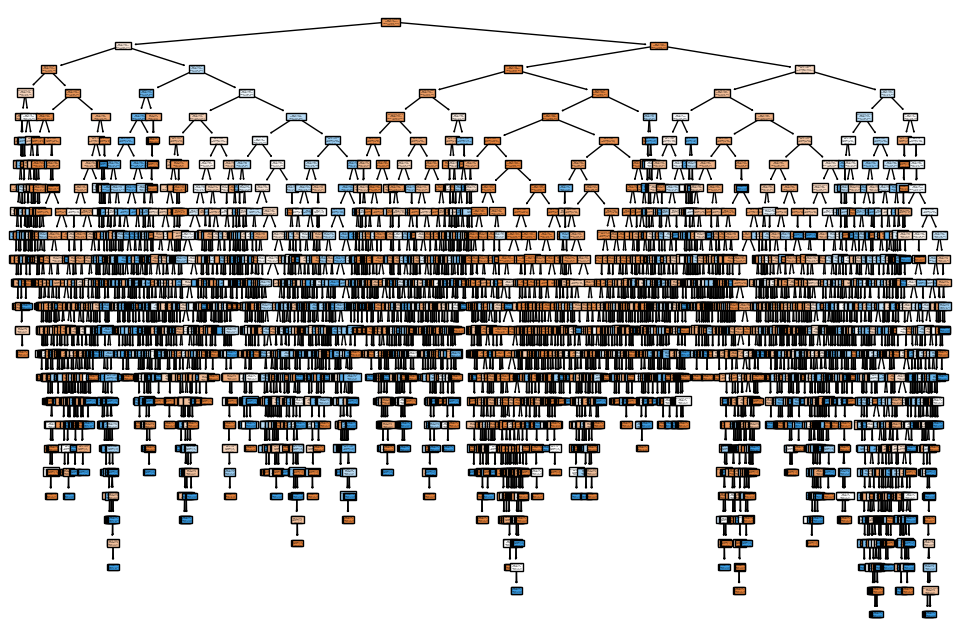

In [80]:
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

#### c. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = random_forest.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

#### Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select columns for modeling
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
bank_client_data = bank_client_data[selected_columns]

# Map target variable to numeric labels
bank_client_data['y'] = bank_client_data['y'].map({'no': 0, 'yes': 1})

# Split the dataset into features and target variable
X = bank_client_data.drop('y', axis=1)
y = bank_client_data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Tabulate performance metrics
results_df = pd.DataFrame.from_dict(results, orient='index')

print("Performance Metrics:")
print(results_df)

Performance Metrics:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.910537   0.673077  0.411765  0.510949
Decision Tree        0.889658   0.513542  0.527273  0.520317
Random Forest        0.915271   0.656954  0.530481  0.586982


# Part 2 – Unsupervised Learning

### Given the ‘credit_card’ dataset, below is the data definition:

In [127]:
credit_card_data=pd.read_csv(r"C:\Users\saiaj\Downloads\credit_card.csv")
credit_card_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [90]:
credit_card_data.shape

(8950, 18)

In [91]:
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [96]:
credit_card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 

In [128]:
credit_card_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [129]:
credit_card_data['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [130]:
mean1=credit_card_data['MINIMUM_PAYMENTS'].mean()
mean1

864.2065423050828

In [131]:
credit_card_data['MINIMUM_PAYMENTS'].fillna(mean1, inplace=True)

In [132]:
credit_card_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [133]:
credit_card_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [134]:
columns_list1=credit_card_data.columns
columns_list1

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [135]:
for i in columns_list1:
    print(i," : \n",credit_card_data[i].unique())
    print("***\n")

CUST_ID  : 
 ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
***

BALANCE  : 
 [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
***

BALANCE_FREQUENCY  : 
 [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
***

PURCHASES  : 
 [  95.4     0.    773.17 ...  291.12  144.4  1093.25]
***

ONEOFF_PURCHASES  : 
 [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
***

INSTALLMENTS_PURCHASES  : 
 [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
***

CASH_ADVANCE  : 
 [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
***

PURCHASES_FREQUENCY  : 
 [0.166667 0.       1.       0.083333 0.6666

In [136]:
credit_card_data['CREDIT_LIMIT']

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

In [137]:
mode1=credit_card_data['CREDIT_LIMIT'].value_counts().index[0]
mode1

3000.0

In [138]:
credit_card_data['CREDIT_LIMIT'].fillna(mode1, inplace=True)

In [139]:
credit_card_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [140]:
credit_card_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [141]:
credit_card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### Q2. Perform the following Exploratory Data Analysis tasks

*a. Missing Value Analysis*

*b. Outlier Treatment using the Z-score method*

*c. Deal with correlated variables*


#### a. Missing Value Analysis

In [145]:
missing_values=credit_card_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


#### b. Outlier Treatment using the Z-score method

In [143]:
import pandas as pd
import numpy as np

# Select columns for outlier treatment
columns_for_outlier_treatment = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Calculate Z-scores for selected columns
z_scores = (credit_card_data[columns_for_outlier_treatment] - credit_card_data[columns_for_outlier_treatment].mean()) / credit_card_data[columns_for_outlier_treatment].std()

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

In [144]:
z_scores

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960325,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688640,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826054,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826054,-0.598655,4.878032e-17,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905359,-0.364347,-2.657764e-01,-0.525522,0.360659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960325,-0.486189,-3.498345e-01,1.183885,-4.122537
8946,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960325,-0.503368,4.878032e-17,-0.525522,-4.122537
8947,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,-0.476043,-0.390617,-0.960325,-0.570583,-3.354467e-01,0.329182,-4.122537
8948,-0.745133,-0.185466,-0.469526,-0.356914,-0.454551,-0.449327,-1.221690,-0.678623,-0.916944,0.157518,-0.182988,-0.591763,-1.097738,-0.580503,-3.468871e-01,0.329182,-4.122537


#### c. Deal with correlated variables

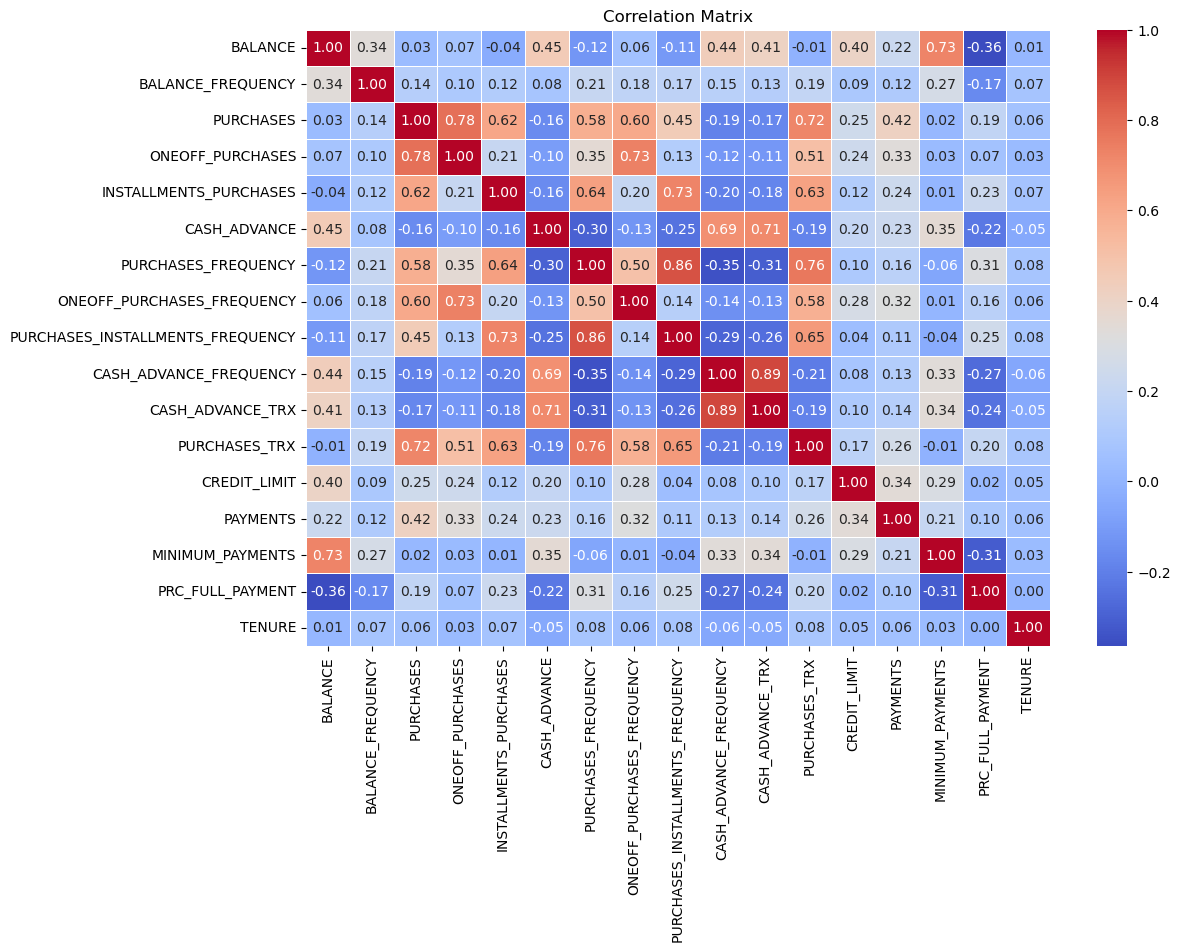

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns for correlation analysis
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Calculate the correlation matrix
correlation_matrix = credit_card_data[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [126]:
credit_card_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,NaN,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,NaN
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,NaN


In [153]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_card_data[numerical_columns])

# Initialize PCA with n_components=None to keep all components
pca = PCA(n_components=None)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Calculate the cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components required to explain 95% of the variance
n_components_95 = (explained_variance_ratio_cumulative >= 0.95).argmax() + 1

# Perform PCA with the determined number of components
pca = PCA(n_components=n_components_95)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

# Concatenate PCA results with non-PCA columns
final_df = pd.concat([credit_card_data.drop(columns=numerical_columns), pca_df], axis=1)

# Now final_df contains the original data with PCA-transformed features explaining 95% of the variance
print(final_df)

     CUST_ID       PC1       PC2       PC3       PC4       PC5       PC6  \
0     C10001 -1.682243 -1.076391  0.488560  0.665524  0.018396  0.050943   
1     C10002 -1.138206  2.506525  0.601184 -0.120262  0.605672 -1.137045   
2     C10003  0.969712 -0.383516  0.102277  1.209425 -2.172850 -0.217272   
3     C10004 -0.873597  0.043193  1.460044  1.152106  0.295558 -0.123848   
4     C10005 -1.599443 -0.688515  0.365164  0.990204 -0.486864  0.075457   
...      ...       ...       ...       ...       ...       ...       ...   
8945  C19186 -0.359718 -2.016182 -0.995368 -2.727688  0.268844  2.672203   
8946  C19187 -0.564450 -1.639155 -1.290242 -1.860930  0.187195  3.383365   
8947  C19188 -0.926291 -1.810817 -0.474747 -2.280531  0.386588  2.975917   
8948  C19189 -2.336616 -0.657971  0.974764 -1.861593  0.069985  3.173547   
8949  C19190 -0.556493 -0.400532  1.015272 -1.953641 -1.242800  3.752601   

           PC7       PC8       PC9      PC10      PC11      PC12  
0     0.829087 -0.03

In [147]:
pca

PCA(n_components=12)

In [148]:
scaler

StandardScaler()

In [149]:
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [150]:
pca_result

array([[-1.68224316e+00, -1.07639111e+00,  4.88559998e-01, ...,
        -7.78081018e-02, -2.35191922e-01, -5.38978617e-02],
       [-1.13820588e+00,  2.50652460e+00,  6.01183724e-01, ...,
        -7.77623585e-01, -8.71459685e-01, -6.01889888e-01],
       [ 9.69711555e-01, -3.83515985e-01,  1.02277125e-01, ...,
        -1.84417333e-03, -7.61708398e-01,  6.84262748e-01],
       ...,
       [-9.26290623e-01, -1.81081726e+00, -4.74747059e-01, ...,
        -8.29746021e-01,  1.20727724e-01,  7.02609554e-02],
       [-2.33661578e+00, -6.57970849e-01,  9.74763688e-01, ...,
         2.68877070e-01, -3.06432317e-01, -1.14495233e-01],
       [-5.56493458e-01, -4.00532261e-01,  1.01527160e+00, ...,
         3.46061246e-01, -5.04705581e-01,  1.14771211e-01]])

In [151]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.682243,-1.076391,0.488560,0.665524,0.018396,0.050943,0.829087,-0.038868,0.115368,-0.077808,-0.235192,-0.053898
1,-1.138206,2.506525,0.601184,-0.120262,0.605672,-1.137045,-0.374504,0.132083,0.687772,-0.777624,-0.871460,-0.601890
2,0.969712,-0.383516,0.102277,1.209425,-2.172850,-0.217272,-1.572636,-0.170293,-0.883845,-0.001844,-0.761708,0.684263
3,-0.873597,0.043193,1.460044,1.152106,0.295558,-0.123848,-0.280450,-0.559256,-0.146539,0.393205,0.744914,0.149906
4,-1.599443,-0.688515,0.365164,0.990204,-0.486864,0.075457,0.707816,0.208809,0.584616,-0.121793,-0.455135,-0.106305
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.359718,-2.016182,-0.995368,-2.727688,0.268844,2.672203,-1.524841,0.199923,1.420790,-0.845204,0.194283,0.022796
8946,-0.564450,-1.639155,-1.290242,-1.860930,0.187195,3.383365,-1.084266,-0.555176,0.887023,-1.245926,0.066394,0.494243
8947,-0.926291,-1.810817,-0.474747,-2.280531,0.386588,2.975917,-1.371019,-0.347197,0.838496,-0.829746,0.120728,0.070261
8948,-2.336616,-0.657971,0.974764,-1.861593,0.069985,3.173547,-0.932073,0.147089,1.253907,0.268877,-0.306432,-0.114495


In [152]:
final_df

,CUST_ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,C10001,-1.682243,-1.076391,0.488560,0.665524,0.018396,0.050943,0.829087,-0.038868,0.115368,-0.077808,-0.235192,-0.053898
1,C10002,-1.138206,2.506525,0.601184,-0.120262,0.605672,-1.137045,-0.374504,0.132083,0.687772,-0.777624,-0.871460,-0.601890
2,C10003,0.969712,-0.383516,0.102277,1.209425,-2.172850,-0.217272,-1.572636,-0.170293,-0.883845,-0.001844,-0.761708,0.684263
3,C10004,-0.873597,0.043193,1.460044,1.152106,0.295558,-0.123848,-0.280450,-0.559256,-0.146539,0.393205,0.744914,0.149906
4,C10005,-1.599443,-0.688515,0.365164,0.990204,-0.486864,0.075457,0.707816,0.208809,0.584616,-0.121793,-0.455135,-0.106305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-0.359718,-2.016182,-0.995368,-2.727688,0.268844,2.672203,-1.524841,0.199923,1.420790,-0.845204,0.194283,0.022796
8946,C19187,-0.564450,-1.639155,-1.290242,-1.860930,0.187195,3.383365,-1.084266,-0.555176,0.887023,-1.245926,0.066394,0.494243
8947,C19188,-0.926291,-1.810817,-0.474747,-2.280531,0.386588,2.975917,-1.371019,-0.347197,0.838496,-0.829746,0.120728,0.070261
8948,C19189,-2.336616,-0.657971,0.974764,-1.861593,0.069985,3.173547,-0.932073,0.147089,1.253907,0.268877,-0.306432,-0.114495


#### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

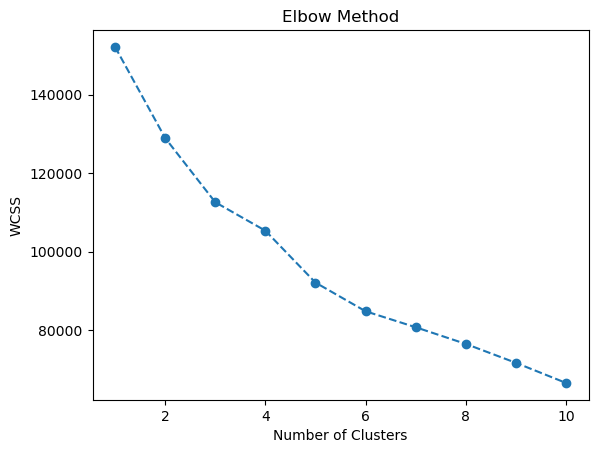

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_card_data[numerical_columns])

# Calculate within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [159]:
kmeans

KMeans(n_clusters=10, random_state=42)

#### Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot

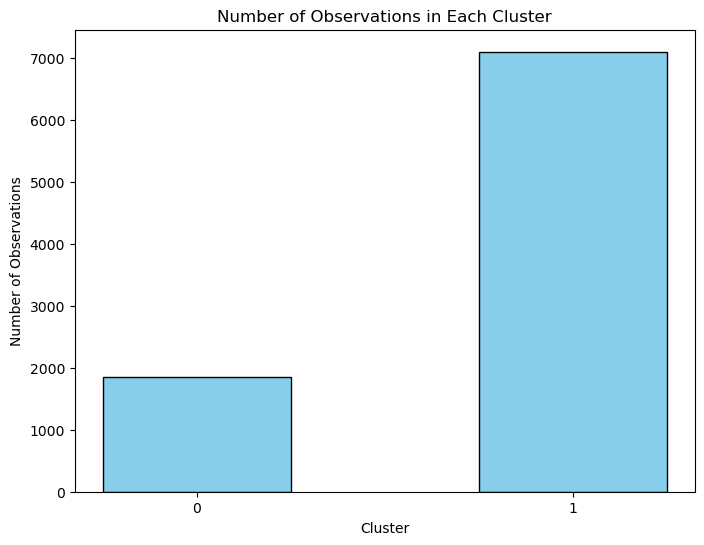

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_card_data[numerical_columns])

# Find the optimum value of k using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Choose the value of k that maximizes silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2

# Build the final k-means clustering model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(scaled_data)

# Get cluster labels for each observation
cluster_labels = final_kmeans.labels_

# Plot a bar plot showing the number of observations in each cluster
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=range(optimal_k + 1), align='left', rwidth=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Number of Observations in Each Cluster')
plt.xticks(range(optimal_k))
plt.show()

In [156]:
cluster_labels

array([1, 1, 0, ..., 1, 1, 1])

In [157]:
final_kmeans

KMeans(n_clusters=2, random_state=42)